In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings

In [3]:
register_matplotlib_converters()
warnings.filterwarnings("ignore") 

In [4]:
df = pd.read_csv("coin_Aave.csv")


In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'Close'], inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


In [6]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)


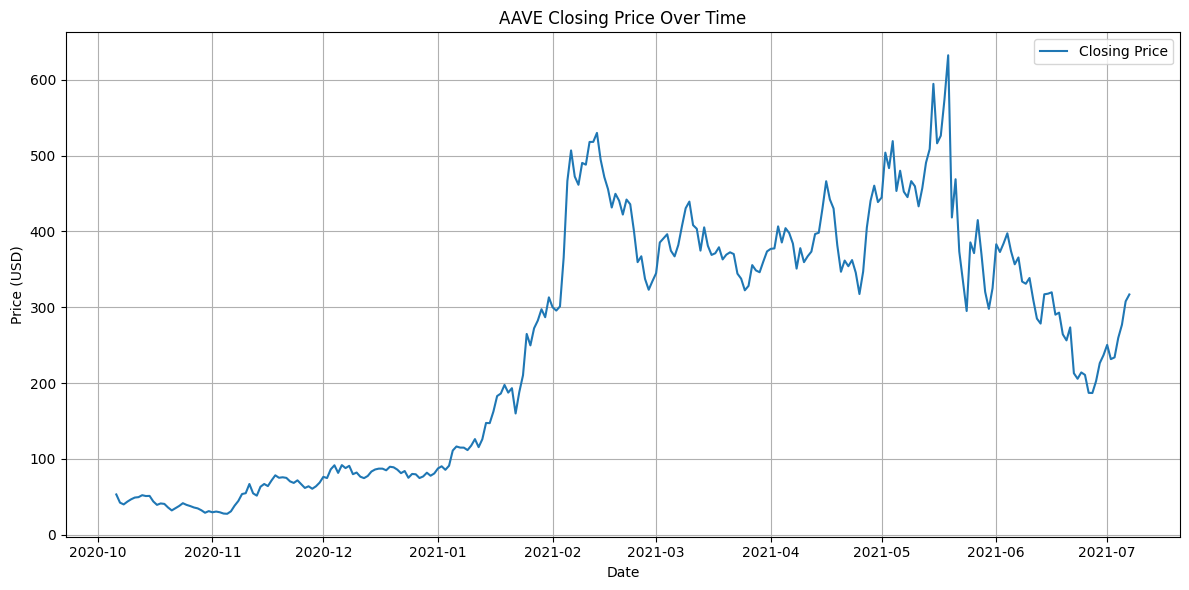

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('AAVE Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
try:
    model = ARIMA(df['Close'], order=(1, 1, 1))  # Safe choice for (p,d,q)
    model_fit = model.fit()
    print("ARIMA model fit successfully.")
except Exception as e:
    print("Error fitting ARIMA model:", e)
    model_fit = None



ARIMA model fit successfully.


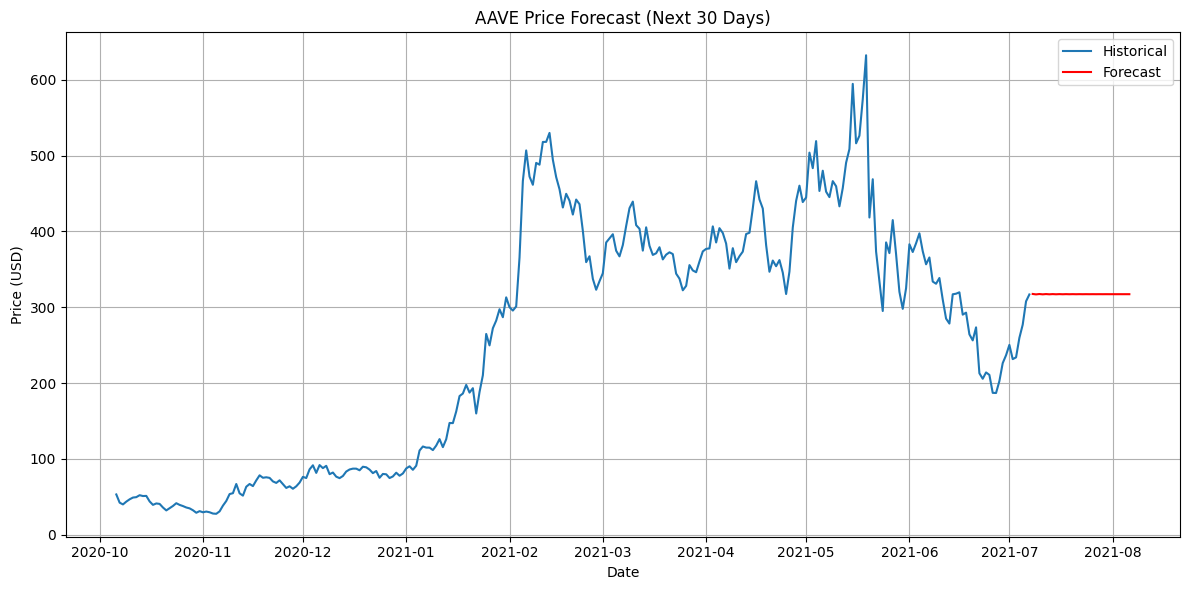

In [9]:
if model_fit:
    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)

    # Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Historical')
    plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
    plt.title('AAVE Price Forecast (Next 30 Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()